In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

In [2]:
path=r"C:\Users\muyen\Downloads\class_data (1)\class_data\gapminder.csv"
gap=pd.read_csv(path)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [5]:
# Now let's take a look at the data
gap

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [6]:
# Data Types for our columns

print(gap.dtypes)

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object


In [9]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in gap.columns:
    pct_missing = np.mean(gap[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

country - 0%
continent - 0%
year - 0%
lifeExp - 0%
pop - 0%
gdpPercap - 0%


<AxesSubplot:>

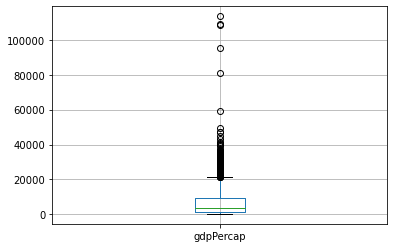

In [10]:
# Are there any Outliers?

gap.boxplot(column=['gdpPercap'])

In [11]:
# Order our Data a little bit to see

gap.sort_values(by=['gdpPercap'], inplace=False, ascending=False)

,country,continent,year,lifeExp,pop,gdpPercap
853,Kuwait,Asia,1957,58.033,212846,113523.132900
856,Kuwait,Asia,1972,67.712,841934,109347.867000
852,Kuwait,Asia,1952,55.565,160000,108382.352900
854,Kuwait,Asia,1962,60.470,358266,95458.111760
855,Kuwait,Asia,1967,64.624,575003,80894.883260
...,...,...,...,...,...,...
333,"Congo, Dem. Rep.",Africa,1997,42.587,47798986,312.188423
624,Guinea-Bissau,Africa,1952,32.500,580653,299.850319
876,Lesotho,Africa,1952,42.138,748747,298.846212
335,"Congo, Dem. Rep.",Africa,2007,46.462,64606759,277.551859


In [12]:
# Correlation Matrix between all numeric columns

gap.corr(method ='pearson')

,year,lifeExp,pop,gdpPercap
year,1.000000,0.435611,0.082308,0.227318
lifeExp,0.435611,1.000000,0.064955,0.583706
pop,0.082308,0.064955,1.000000,-0.025600
gdpPercap,0.227318,0.583706,-0.025600,1.000000


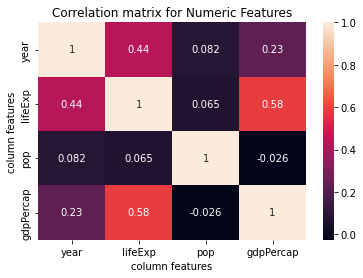

In [13]:
correlation_matrix = gap.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("column features")

plt.ylabel("column features")

plt.show()

In [14]:
# Using factorize - this assigns a random numeric value for each unique categorical value

gap.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,country,continent,year,lifeExp,pop,gdpPercap
country,1.000000e+00,-1.238854e-01,1.400337e-16,0.956020,0.999975,0.999975
continent,-1.238854e-01,1.000000e+00,-2.899716e-17,-0.106500,-0.123882,-0.123882
year,1.400337e-16,-2.899716e-17,1.000000e+00,0.023351,0.007018,0.007018
lifeExp,9.560199e-01,-1.064997e-01,2.335065e-02,1.000000,0.956160,0.956160
pop,9.999754e-01,-1.238823e-01,7.017760e-03,0.956160,1.000000,1.000000
gdpPercap,9.999754e-01,-1.238823e-01,7.017760e-03,0.956160,1.000000,1.000000


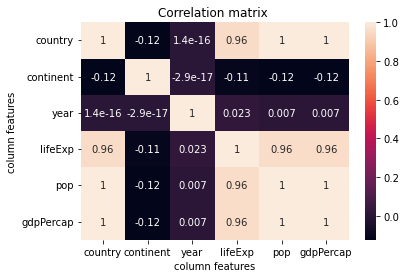

In [15]:
correlation_matrix = gap.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix ")

plt.xlabel("column features")

plt.ylabel("column features")

plt.show()

In [16]:
correlation_mat = gap.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

country    country      1.000000e+00
           continent   -1.238854e-01
           year         1.400337e-16
           lifeExp      9.560199e-01
           pop          9.999754e-01
           gdpPercap    9.999754e-01
continent  country     -1.238854e-01
           continent    1.000000e+00
           year        -2.899716e-17
           lifeExp     -1.064997e-01
           pop         -1.238823e-01
           gdpPercap   -1.238823e-01
year       country      1.400337e-16
           continent   -2.899716e-17
           year         1.000000e+00
           lifeExp      2.335065e-02
           pop          7.017760e-03
           gdpPercap    7.017760e-03
lifeExp    country      9.560199e-01
           continent   -1.064997e-01
           year         2.335065e-02
           lifeExp      1.000000e+00
           pop          9.561602e-01
           gdpPercap    9.561602e-01
pop        country      9.999754e-01
           continent   -1.238823e-01
           year         7.017760e-03
 

In [17]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

country    continent   -1.238854e-01
continent  country     -1.238854e-01
pop        continent   -1.238823e-01
gdpPercap  continent   -1.238823e-01
continent  pop         -1.238823e-01
           gdpPercap   -1.238823e-01
lifeExp    continent   -1.064997e-01
continent  lifeExp     -1.064997e-01
           year        -2.899716e-17
year       continent   -2.899716e-17
country    year         1.400337e-16
year       country      1.400337e-16
           gdpPercap    7.017760e-03
pop        year         7.017760e-03
year       pop          7.017760e-03
gdpPercap  year         7.017760e-03
lifeExp    year         2.335065e-02
year       lifeExp      2.335065e-02
lifeExp    country      9.560199e-01
country    lifeExp      9.560199e-01
pop        lifeExp      9.561602e-01
gdpPercap  lifeExp      9.561602e-01
lifeExp    pop          9.561602e-01
           gdpPercap    9.561602e-01
country    gdpPercap    9.999754e-01
gdpPercap  country      9.999754e-01
pop        country      9.999754e-01
c

In [18]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

lifeExp    country      0.956020
country    lifeExp      0.956020
pop        lifeExp      0.956160
gdpPercap  lifeExp      0.956160
lifeExp    pop          0.956160
           gdpPercap    0.956160
country    gdpPercap    0.999975
gdpPercap  country      0.999975
pop        country      0.999975
country    pop          0.999975
pop        gdpPercap    1.000000
country    country      1.000000
lifeExp    lifeExp      1.000000
gdpPercap  pop          1.000000
year       year         1.000000
continent  continent    1.000000
pop        pop          1.000000
gdpPercap  gdpPercap    1.000000
dtype: float64


In [23]:
gap

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


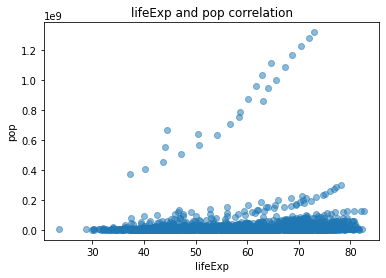

In [27]:
plt.scatter(x=gap['lifeExp'], y=gap['pop'], alpha=0.5)
plt.title('lifeExp and pop correlation')
plt.xlabel('lifeExp')
plt.ylabel('pop')
plt.show()

<AxesSubplot:xlabel='lifeExp', ylabel='pop'>

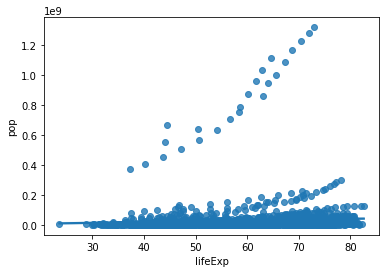

In [26]:
sns.regplot(x="lifeExp", y="pop", data=gap)

In [28]:
# make all columns numeric for easy correlation analysis

df_numerized = gap

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,country,continent,year,lifeExp,pop,gdpPercap
0,0,2,1952,28.801,8425333,779.445314
1,0,2,1957,30.332,9240934,820.853030
2,0,2,1962,31.997,10267083,853.100710
3,0,2,1967,34.020,11537966,836.197138
4,0,2,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,141,0,1987,62.351,9216418,706.157306
1700,141,0,1992,60.377,10704340,693.420786
1701,141,0,1997,46.809,11404948,792.449960
1702,141,0,2002,39.989,11926563,672.038623


In [29]:
# having numeralized the columns,lets find the correlation among the columns 

df_numerized.corr(method='pearson')

,country,continent,year,lifeExp,pop,gdpPercap
country,1.000000e+00,2.423501e-02,2.022370e-14,0.061364,-0.064628,0.021017
continent,2.423501e-02,1.000000e+00,1.402351e-15,0.634397,0.094365,0.465591
year,2.022370e-14,1.402351e-15,1.000000e+00,0.435611,0.082308,0.227318
lifeExp,6.136355e-02,6.343965e-01,4.356112e-01,1.000000,0.064955,0.583706
pop,-6.462761e-02,9.436522e-02,8.230808e-02,0.064955,1.000000,-0.025600
gdpPercap,2.101687e-02,4.655908e-01,2.273181e-01,0.583706,-0.025600,1.000000


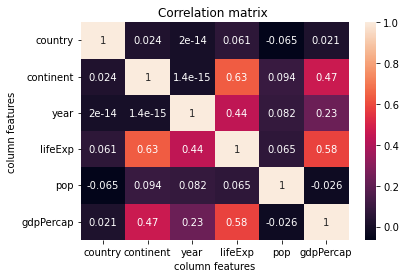

In [30]:
# correlation matrix for all columns

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix ")

plt.xlabel("column features")

plt.ylabel("column features")

plt.show()